In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read data
df = pd.read_csv('/content/Churn_Modelling(TASK-3).csv')

In [6]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [7]:
# Encoding
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Geography'] = labelencoder.fit_transform(df['Geography'])

In [8]:
# Split data into features and target variable
X = df.drop(columns='Exited')
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [9]:
def train_and_evaluate_model(model, model_name):
    # Train model
    model.fit(x_train, y_train)

    # Model Score
    model_score = model.score(x_train, y_train)
    print(f"{model_name} Model Score: {model_score:.2f}")

    # Prediction
    y_pred = model.predict(x_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

    # ROC curve
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0, 1], [0, 1], color='black', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve (Accuracy: {accuracy * 100:.2f}%)')
    plt.show()

In [10]:
# Create models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
}

Random Forest Model Score: 1.00
Random Forest Accuracy: 85.77%


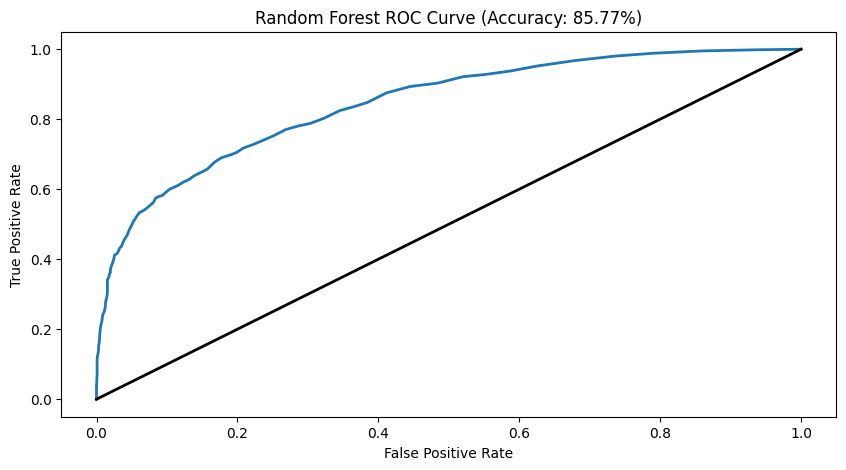

Logistic Regression Model Score: 0.79
Logistic Regression Accuracy: 78.90%


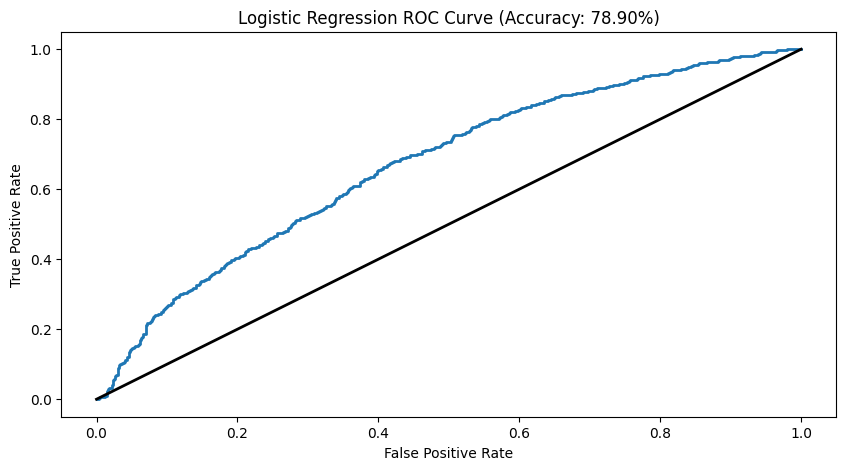

Gradient Boosting Model Score: 0.87
Gradient Boosting Accuracy: 86.37%


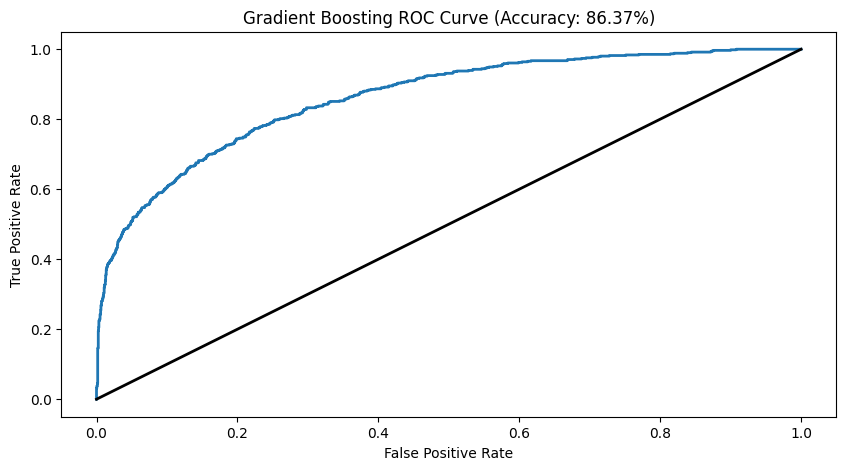

In [11]:
# Train and evaluate models
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)

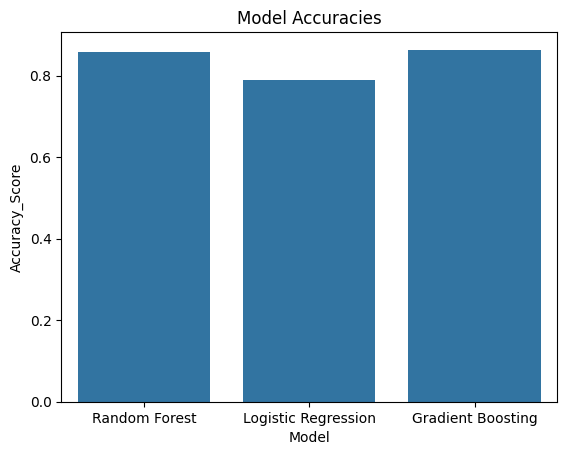

In [12]:
# Barplot of accuracies
model_results = pd.DataFrame({"Model": models.keys(), "Accuracy_Score": [model.score(x_test, y_test) for model in models.values()]})
sns.barplot(x="Model", y="Accuracy_Score", data=model_results)
plt.title('Model Accuracies')
plt.show()